> ## <b> Housing Price Predication Project </b>
***
<b><em> By: Mr. Kundan kaushik </em></b>

<b><em> Internship Batch:31 </em></b>

In [2]:
# for data wrangling purpose
import pandas as pd 

# Basic Numerical calculation Library
import numpy as np 

# For Visualization
import seaborn as sns 
# For Plotting
import matplotlib.pyplot as plt 

#For warning ignore
import warnings 
# Filtering warnings
warnings.filterwarnings('ignore') 
%matplotlib inline

## Read CSV File

In [3]:
# importing dataset Train CSV file using Pandas libarary
housing_df = pd.read_csv('train.csv')

In [4]:
print('No. of Rows :',housing_df.shape[0])
print('No. of Columns :', housing_df.shape[1])
pd.set_option('display.max_columns',None) # this will enable us to see truncated columns
housing_df.head()

No. of Rows : 1168
No. of Columns : 81


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


## DataSet Info

***
- **Dataset consist of two CSV files, one for training model & other for testing dataset.**
- **Training dataset contain 1168 Rows & 81 Columns.**
- **We can see there are some missing values are present in dataset.**

### Dataset Feature Description :
---
- **MSSubClass: Identifies the type of dwelling involved in the sale.**	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

- **MSZoning: Identifies the general zoning classification of the sale.**
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
- **LotFrontage: Linear feet of street connected to property**

- **LotArea: Lot size in square feet**

- **Street: Type of road access to property**

       Grvl	Gravel	
       Pave	Paved
       	
- **Alley: Type of alley access to property**

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
- **LotShape: General shape of property**

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
- **LandContour: Flatness of the property**

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
- **Utilities: Type of utilities available**
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
- **LotConfig: Lot configuration**

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
- **LandSlope: Slope of property**
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
- **Neighborhood: Physical locations within Ames city limits**

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
- **Condition1: Proximity to various conditions**
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
- **Condition2: Proximity to various conditions (if more than one is present)**
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
- **BldgType: Type of dwelling**
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
- **HouseStyle: Style of dwelling**
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
- **OverallQual: Rates the overall material and finish of the house**

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
- **OverallCond: Rates the overall condition of the house**

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
- **YearBuilt: Original construction date**

- **YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)**

- **RoofStyle: Type of roof**

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
- **RoofMatl: Roof material**

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
- **Exterior1st: Exterior covering on house**

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
- **Exterior2nd: Exterior covering on house (if more than one material)**

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
- **MasVnrType: Masonry veneer type**

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
- **MasVnrArea: Masonry veneer area in square feet**

- **ExterQual: Evaluates the quality of the material on the exterior**
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
- **ExterCond: Evaluates the present condition of the material on the exterior**
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
- **Foundation: Type of foundation**
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
- **BsmtQual: Evaluates the height of the basement**

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
- **BsmtCond: Evaluates the general condition of the basement**

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
- **BsmtExposure: Refers to walkout or garden level walls**

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
- **BsmtFinType1: Rating of basement finished area**

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
- **BsmtFinSF1: Type 1 finished square feet**

- **BsmtFinType2: Rating of basement finished area (if multiple types)**

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

- **BsmtFinSF2: Type 2 finished square feet**

- **BsmtUnfSF: Unfinished square feet of basement area**

- **TotalBsmtSF: Total square feet of basement area**

- **Heating: Type of heating**
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
- **HeatingQC: Heating quality and condition**

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
- **CentralAir: Central air conditioning**

       N	No
       Y	Yes
		
- **Electrical: Electrical system**

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
- **1stFlrSF: First Floor square feet**
 
- **2ndFlrSF: Second floor square feet**

- **LowQualFinSF: Low quality finished square feet (all floors)**

- **GrLivArea: Above grade (ground) living area square feet**

- **BsmtFullBath: Basement full bathrooms**

- **BsmtHalfBath: Basement half bathrooms**

- **FullBath: Full bathrooms above grade**

- **HalfBath: Half baths above grade**

- **Bedroom: Bedrooms above grade (does NOT include basement bedrooms)**

- **Kitchen: Kitchens above grade**

- **KitchenQual: Kitchen quality**

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
- **TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)**

- **Functional: Home functionality (Assume typical unless deductions are warranted)**

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
- **Fireplaces: Number of fireplaces**

- **FireplaceQu: Fireplace quality**

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
- **GarageType: Garage location**
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
- **GarageYrBlt: Year garage was built**
		
- **GarageFinish: Interior finish of the garage**

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
- **GarageCars: Size of garage in car capacity**

- **GarageArea: Size of garage in square feet**

- **GarageQual: Garage quality**

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
- **GarageCond: Garage condition**

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
- **PavedDrive: Paved driveway**

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
- **WoodDeckSF: Wood deck area in square feet**

- **OpenPorchSF: Open porch area in square feet**

- **EnclosedPorch: Enclosed porch area in square feet**

- **3SsnPorch: Three season porch area in square feet**

- **ScreenPorch: Screen porch area in square feet**

- **PoolArea: Pool area in square feet**

- **PoolQC: Pool quality**
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
- **Fence: Fence quality**
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
- **MiscFeature: Miscellaneous feature not covered in other categories**
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
- **MiscVal: $Value of miscellaneous feature**

- **MoSold: Month Sold (MM)**

- **YrSold: Year Sold (YYYY)**

- **SaleType: Type of sale**
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
-  **SaleCondition: Condition of sale**

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)  

In [5]:
# As we have too many columns let sort columns by their datatype
housing_df.columns.to_series().groupby(housing_df.dtypes).groups

{int64: ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'], float64: ['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], object: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'Garage

### Data Integrity check

In [6]:
housing_df.duplicated().sum()

0

### Check for presense of any whitespaces, '?', 'NA', '-' in dataset

In [7]:
housing_df.isin(['NA','N/A','-',' ','?',' ?']).sum().any()

False

### Missing value check

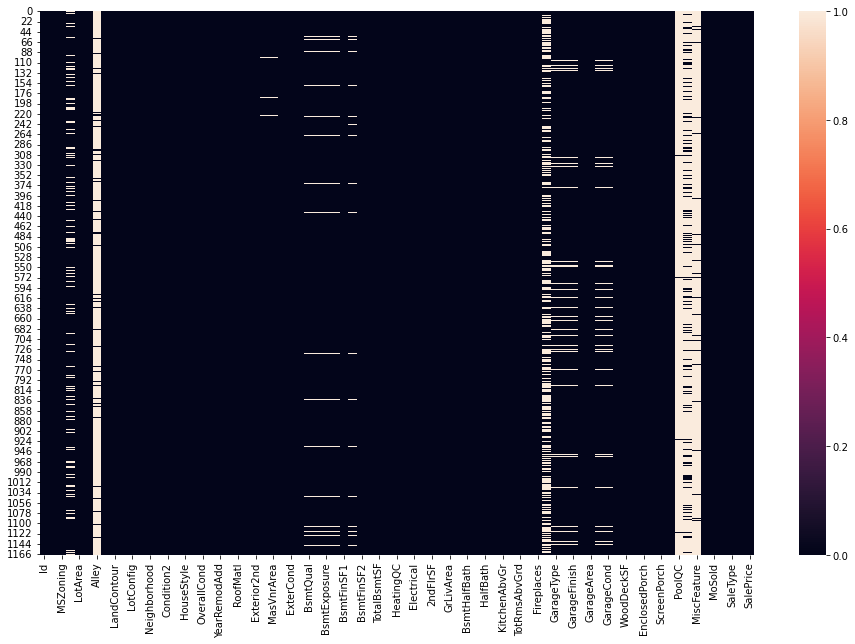

In [8]:
sns.set_palette('coolwarm_r')
plt.figure(figsize = (16,10))
sns.heatmap(housing_df.isnull())
plt.show()

In [9]:
# Finding what percentage of data is missing from dataset
pd.set_option('display.max_rows',None) 
missing_values = housing_df.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(housing_df))*100
print(pd.concat([missing_values, percentage_missing_values], axis = 1, keys =['Missing Values', '% Missing data']))

               Missing Values  % Missing data
PoolQC                   1161       99.400685
MiscFeature              1124       96.232877
Alley                    1091       93.407534
Fence                     931       79.708904
FireplaceQu               551       47.174658
LotFrontage               214       18.321918
GarageYrBlt                64        5.479452
GarageFinish               64        5.479452
GarageType                 64        5.479452
GarageQual                 64        5.479452
GarageCond                 64        5.479452
BsmtExposure               31        2.654110
BsmtFinType2               31        2.654110
BsmtQual                   30        2.568493
BsmtCond                   30        2.568493
BsmtFinType1               30        2.568493
MasVnrType                  7        0.599315
MasVnrArea                  7        0.599315
Id                          0        0.000000
Functional                  0        0.000000
Fireplaces                  0     

### Missing Values Imputation

### - **1. Missing Value Imputation in PoolQC**
***
#### PoolQC description:
PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

In [10]:
housing_df['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

- **Feature Pool Quality contain more than 99 % missing data, so We can drop feature.**

### - **2. Missing Value Imputation in MiscFeature, Alley, Fence, FireplaceQC**
***
                 Missing Value Count   Percentage Missing Values

    MiscFeature              1124       96.232877 %
    Alley                    1091       93.407534 %
    Fence                     931       79.708904 %
    FireplaceQu               551       47.174658 %

- **These Above features contain high amount of Missing Data, There is no way to imputate these data.** 

***So, we are going to drop these features.***

In [11]:
housing_df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis =1, inplace = True)

### - **3. Missing Value Imputation in Lot Frontage**
***
**LotFrontage: Linear feet of street connected to property**

LotFrontage is numerical feature which can imputate based mean or median value. Lets Check boxplot & distribution of LotFrontage feature

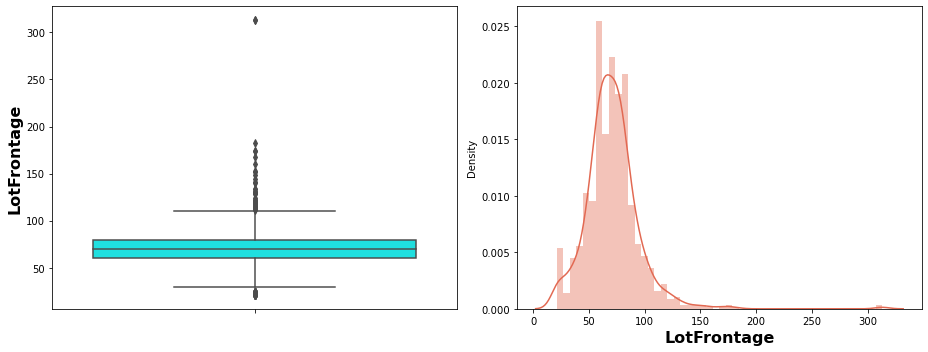

In [12]:
plt.figure(figsize= (13,5))
plt.subplot(1,2,1)
sns.boxplot( y = 'LotFrontage', data= housing_df, color='cyan')
plt.ylabel('LotFrontage', fontweight='bold', fontsize= 16)
plt.subplot(1,2,2)
sns.distplot(housing_df['LotFrontage'])
plt.xlabel('LotFrontage', fontweight='bold',fontsize=16)
plt.tight_layout()
plt.show()

In [13]:
print('Mean of LotFrontage:',housing_df['LotFrontage'].mean())
print('Median of LotFrontage:',housing_df['LotFrontage'].median())

Mean of LotFrontage: 70.98846960167715
Median of LotFrontage: 70.0


 **Outliers are Present in Lot frontage, we know that mean is sensitive to presense of outliers. So we gone imputate with Median.** 

In [14]:
housing_df['LotFrontage'] = housing_df['LotFrontage'].fillna(housing_df['LotFrontage'].median())

In [15]:
housing_df['LotFrontage'].isnull().any()

False

### - **4. Missing Value Imputation in Garage Type**
***
#### Garage Type Description :-
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

In [16]:
housing_df['GarageType'].value_counts()

Attchd     691
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64

**GarageType is Categorical feature which can be imputate with Mode.**

In [17]:
housing_df['GarageType'] = housing_df['GarageType'].fillna(housing_df['GarageType'].mode()[0])

In [18]:
housing_df['GarageType'].isnull().any()

False

### - **5. Missing Value Imputation in GarageYrBlt**
***
#### GarageYrBlt Description :-
**GarageYrBlt: Year garage was built**

In [19]:
housing_df['GarageYrBlt'].mode()[0]

2006.0

 **GarageYrBlt is Categorical feature which can be imputate with Mode.**

In [20]:
housing_df['GarageYrBlt']=housing_df['GarageYrBlt'].fillna(housing_df['GarageYrBlt'].mode()[0])

### - **6. Missing Value Imputation in GarageFinish**
***
#### GarageFinish Description :-
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	 No Garage

In [21]:
housing_df['GarageFinish'].value_counts()

Unf    487
RFn    339
Fin    278
Name: GarageFinish, dtype: int64

In [22]:
housing_df['GarageFinish'].mode()[0]

'Unf'

In [23]:
housing_df['GarageFinish']=housing_df['GarageFinish'].fillna(housing_df['GarageFinish'].mode()[0])

In [24]:
housing_df['GarageFinish'].isnull().any()

False

In [25]:
# Finding what percentage of data is missing from dataset
pd.set_option('display.max_rows',None) 
missing_values = housing_df.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(housing_df))*100
print(pd.concat([missing_values, percentage_missing_values], axis = 1, keys =['Missing Values', '% Missing data']))

               Missing Values  % Missing data
GarageQual                 64        5.479452
GarageCond                 64        5.479452
BsmtExposure               31        2.654110
BsmtFinType2               31        2.654110
BsmtQual                   30        2.568493
BsmtFinType1               30        2.568493
BsmtCond                   30        2.568493
MasVnrType                  7        0.599315
MasVnrArea                  7        0.599315
KitchenQual                 0        0.000000
KitchenAbvGr                0        0.000000
BedroomAbvGr                0        0.000000
Id                          0        0.000000
Functional                  0        0.000000
HalfBath                    0        0.000000
FullBath                    0        0.000000
BsmtHalfBath                0        0.000000
BsmtFullBath                0        0.000000
GrLivArea                   0        0.000000
LowQualFinSF                0        0.000000
TotRmsAbvGrd                0     

### - **7. Missing Value Imputation in GarageQual**
***
#### GarageQual Description :-
GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [26]:
housing_df['GarageQual'].value_counts()

TA    1050
Fa      39
Gd      11
Ex       2
Po       2
Name: GarageQual, dtype: int64

In [27]:
housing_df['GarageQual'] = housing_df['GarageQual'].fillna(housing_df['GarageQual'].mode()[0])

In [28]:
housing_df['GarageQual'].isnull().any()

False

### - **8. Missing Value Imputation in GarageCond**
***
#### GarageCond Description :-
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [29]:
housing_df['GarageCond'].value_counts()

TA    1061
Fa      28
Gd       8
Po       6
Ex       1
Name: GarageCond, dtype: int64

In [30]:
housing_df['GarageCond'] = housing_df['GarageCond'].fillna(housing_df['GarageCond'].mode()[0])

In [31]:
housing_df['GarageCond'].isnull().any()

False

### - **9. Missing Value Imputation in BsmtFinType2**
***
#### BsmtFinType2 Description :-
BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [32]:
housing_df['BsmtFinType2'].value_counts()

Unf    1002
Rec      43
LwQ      40
BLQ      24
ALQ      16
GLQ      12
Name: BsmtFinType2, dtype: int64

In [33]:
housing_df['BsmtFinType2'] = housing_df['BsmtFinType2'].fillna(housing_df['BsmtFinType2'].mode()[0])

In [34]:
housing_df['BsmtFinType2'].isnull().any()

False

### - **10. Missing Value Imputation in BsmtExposure**
***
#### BsmtExposure Description :-
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

In [35]:
housing_df['BsmtExposure'].value_counts()

No    756
Av    180
Gd    108
Mn     93
Name: BsmtExposure, dtype: int64

In [36]:
housing_df['BsmtExposure'] = housing_df['BsmtExposure'].fillna(housing_df['BsmtExposure'].mode()[0])

In [37]:
housing_df['BsmtExposure'].isnull().any()

False

### - **11. Missing Value Imputation in BsmtFinType1**
***
#### BsmtFinType1 Description :-
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [38]:
housing_df['BsmtFinType1'].value_counts()

Unf    345
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: BsmtFinType1, dtype: int64

In [39]:
housing_df['BsmtFinType1'] = housing_df['BsmtFinType1'].fillna(housing_df['BsmtFinType1'].mode()[0])

In [40]:
housing_df['BsmtFinType1'].isnull().any()

False

### - **12. Missing Value Imputation in BsmtCond**
***
#### BsmtCond Description :-
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

In [41]:
housing_df['BsmtCond'].value_counts()

TA    1041
Gd      56
Fa      39
Po       2
Name: BsmtCond, dtype: int64

In [42]:
housing_df['BsmtCond'] = housing_df['BsmtCond'].fillna(housing_df['BsmtCond'].mode()[0])

In [43]:
housing_df['BsmtCond'].isnull().any()

False

### - **13. Missing Value Imputation in BsmtQual**
***
#### BsmtQual Description :-
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

In [44]:
housing_df['BsmtQual'].value_counts()

TA    517
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64

In [45]:
housing_df['BsmtQual'] = housing_df['BsmtQual'].fillna(housing_df['BsmtQual'].mode()[0])

In [46]:
housing_df['BsmtQual'].isnull().any()

False

### - **14. Missing Value Imputation in MasVnrType**
***
#### MasVnrType Description :-
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	    None
       Stone	Stone

In [47]:
housing_df['MasVnrType'].value_counts()

None       696
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64

In [48]:
housing_df['MasVnrType'] = housing_df['MasVnrType'].fillna(housing_df['MasVnrType'].mode()[0])

In [49]:
housing_df['MasVnrType'].isnull().any()

False

### - **15. Missing Value Imputation in MasVnrArea**
***
#### MasVnrArea Description :-
**MasVnrArea: Masonry veneer area in square feet**

MasVnrArea is numerical feature which can imputate based mean or median value. Lets Check boxplot & distribution of MasVnrArea feature

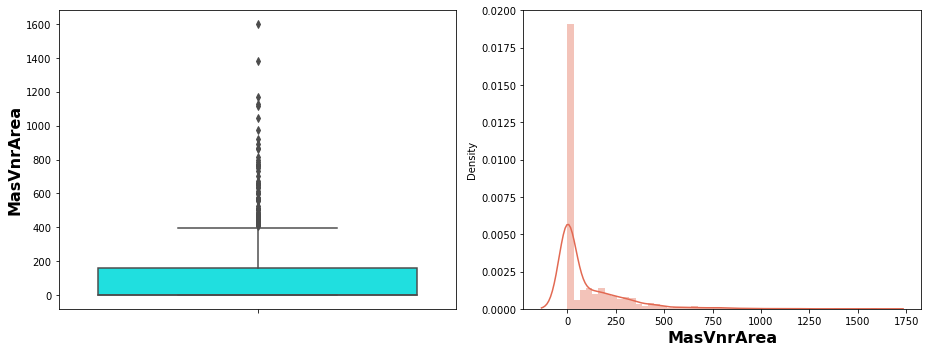

In [50]:
plt.figure(figsize= (13,5))
plt.subplot(1,2,1)
sns.boxplot( y = 'MasVnrArea', data= housing_df, color='cyan')
plt.ylabel('MasVnrArea', fontweight='bold', fontsize= 16)
plt.subplot(1,2,2)
sns.distplot(housing_df['MasVnrArea'])
plt.xlabel('MasVnrArea', fontweight='bold',fontsize=16)
plt.tight_layout()
plt.show()

In [51]:
print('Mean of MasVnrArea:',housing_df['MasVnrArea'].mean())
print('Median of MasVnrArea:',housing_df['MasVnrArea'].median())

Mean of MasVnrArea: 102.31007751937985
Median of MasVnrArea: 0.0


 **Outliers are Present in MasVnrArea, we know that mean is sensitive to presense of outliers. So we gone imputate with Median.** 

In [52]:
housing_df['MasVnrArea'] = housing_df['MasVnrArea'].fillna(housing_df['MasVnrArea'].median())

In [53]:
housing_df['MasVnrArea'].isnull().any()

False

### Final Missing Value Check

In [54]:
# Finding what percentage of data is missing from dataset
pd.set_option('display.max_rows',None) 
missing_values = housing_df.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(housing_df))*100
print(pd.concat([missing_values, percentage_missing_values], axis = 1, keys =['Missing Values', '% Missing data']))

               Missing Values  % Missing data
Id                          0             0.0
FullBath                    0             0.0
Fireplaces                  0             0.0
Functional                  0             0.0
TotRmsAbvGrd                0             0.0
KitchenQual                 0             0.0
KitchenAbvGr                0             0.0
BedroomAbvGr                0             0.0
HalfBath                    0             0.0
BsmtHalfBath                0             0.0
MSSubClass                  0             0.0
BsmtFullBath                0             0.0
GrLivArea                   0             0.0
LowQualFinSF                0             0.0
2ndFlrSF                    0             0.0
1stFlrSF                    0             0.0
Electrical                  0             0.0
CentralAir                  0             0.0
GarageType                  0             0.0
GarageYrBlt                 0             0.0
GarageFinish                0     

**Finally, No Missing value present in Training Dataset.**

**Yes To Go Further !!!**

## Statistical Matrix

In [55]:
housing_df.describe().T.style.background_gradient(subset = ['mean','std','count'], cmap = 'gist_earth')

,count,mean,std,min,25%,50%,75%,max
Id,1168.000000,724.136130,416.159877,1.000000,360.500000,714.500000,1079.500000,1460.000000
MSSubClass,1168.000000,56.767979,41.940650,20.000000,20.000000,50.000000,70.000000,190.000000
LotFrontage,1168.000000,70.807363,22.440317,21.000000,60.000000,70.000000,79.250000,313.000000
LotArea,1168.000000,10484.749144,8957.442311,1300.000000,7621.500000,9522.500000,11515.500000,164660.000000
OverallQual,1168.000000,6.104452,1.390153,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,1168.000000,5.595890,1.124343,1.000000,5.000000,5.000000,6.000000,9.000000
YearBuilt,1168.000000,1970.930651,30.145255,1875.000000,1954.000000,1972.000000,2000.000000,2010.000000
YearRemodAdd,1168.000000,1984.758562,20.785185,1950.000000,1966.000000,1993.000000,2004.000000,2010.000000
MasVnrArea,1168.000000,101.696918,182.218483,0.000000,0.000000,0.000000,160.000000,1600.000000
BsmtFinSF1,1168.000000,444.726027,462.664785,0.000000,0.000000,385.500000,714.500000,5644.000000


### Observation:
- **By comparing 75% and max column we can conclude that some of the feature contain outliers.**
- **By looking at Mean & Median columns we can say that some of features are left skewed while others are right skewed.**
- **Oldest Property is built in 1875 while recent property build in 2010.**

In [56]:
housing_df.describe(include=object).style.background_gradient(cmap='gist_summer_r')

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168
unique,5,2,4,4,1,5,3,25,9,8,5,8,6,8,14,15,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,CBlock,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,928,1164,740,1046,1168,842,1105,182,1005,1154,981,578,915,1144,396,387,703,717,1022,516,547,1071,787,375,1033,1143,585,1090,1070,578,1085,755,551,1114,1125,1071,999,945


### **Feature Extraction for Property Age Related Features**

In [57]:
# Converting years column to age column
housing_df['Year_SinceBuilt'] = housing_df['YearBuilt'].max() - housing_df['YearBuilt']
housing_df['Year_SinceRemodAdded'] = housing_df['YearRemodAdd'].max() - housing_df['YearRemodAdd']
housing_df['Year_Since'] = housing_df['YrSold'].max() - housing_df['YrSold']
housing_df['GarageAge'] = housing_df['GarageYrBlt'].max() - housing_df['GarageYrBlt']

In [58]:
# Dropping old columns in train dataset
housing_df.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

### **Data Cleaning & Preprocessing on Test Dataset**

In [59]:
# Reading Test Dataset
housing_dft = pd.read_csv('test.csv')

In [60]:
print('No. of Rows :',housing_dft.shape[0])
print('No. of Columns :', housing_dft.shape[1])
pd.set_option('display.max_columns',None) # this will enable us to see truncated columns
housing_dft.head()

No. of Rows : 292
No. of Columns : 80


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,337,20,RL,86.0,14157,Pave,NaN,IR1,HLS,AllPub,Corner,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2005,2006,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Gd,TA,PConc,Ex,TA,Gd,GLQ,1249,Unf,0,673,1922,GasA,Ex,Y,SBrkr,1922,0,0,1922,1,0,2,0,3,1,Gd,8,Typ,1,Gd,Attchd,2005.0,Fin,3,676,TA,TA,Y,178,51,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal
1,1018,120,RL,NaN,5814,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1984,1984,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,Gd,TA,Av,GLQ,1036,Unf,0,184,1220,GasA,Gd,Y,SBrkr,1360,0,0,1360,1,0,1,0,1,1,Gd,4,Typ,1,Ex,Attchd,1984.0,RFn,2,565,TA,TA,Y,63,0,0,0,0,0,NaN,NaN,NaN,0,8,2009,COD,Abnorml
2,929,20,RL,NaN,11838,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2001,2001,Hip,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1753,1753,GasA,Ex,Y,SBrkr,1788,0,0,1788,0,0,2,0,3,1,Ex,7,Typ,1,TA,Attchd,2001.0,RFn,2,522,TA,TA,Y,202,151,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
3,1148,70,RL,75.0,12000,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,7,1941,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,275,Unf,0,429,704,GasA,Ex,Y,SBrkr,860,704,0,1564,0,0,1,1,3,1,Fa,7,Typ,1,Gd,Attchd,1941.0,Unf,1,234,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal
4,1227,60,RL,86.0,14598,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Somerst,Feedr,Norm,1Fam,2Story,6,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,74.0,Gd,TA,PConc,Gd,TA,Mn,Unf,0,Unf,0,894,894,GasA,Ex,Y,SBrkr,894,1039,0,1933,0,0,2,1,4,1,Gd,9,Typ,1,Gd,BuiltIn,2007.0,Fin,3,668,TA,TA,Y,100,18,0,0,0,0,NaN,NaN,NaN,0,1,2008,WD,Normal


### Missing Value Imputation in Test Dataset

In [61]:
# Finding what percentage of data is missing from dataset
pd.set_option('display.max_rows',None) 
missing_values = housing_dft.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(housing_dft))*100
print(pd.concat([missing_values, percentage_missing_values], axis = 1, keys =['Missing Values', '% Missing data']))

               Missing Values  % Missing data
PoolQC                    292      100.000000
MiscFeature               282       96.575342
Alley                     278       95.205479
Fence                     248       84.931507
FireplaceQu               139       47.602740
LotFrontage                45       15.410959
GarageType                 17        5.821918
GarageYrBlt                17        5.821918
GarageQual                 17        5.821918
GarageCond                 17        5.821918
GarageFinish               17        5.821918
BsmtCond                    7        2.397260
BsmtFinType2                7        2.397260
BsmtFinType1                7        2.397260
BsmtQual                    7        2.397260
BsmtExposure                7        2.397260
MasVnrArea                  1        0.342466
MasVnrType                  1        0.342466
Electrical                  1        0.342466
HalfBath                    0        0.000000
BsmtFullBath                0     

In [62]:
# Removing columns with high missing value percentage
housing_dft.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis =1, inplace = True)

In [63]:
housing_dft['LotFrontage'] = housing_dft['LotFrontage'].fillna(housing_dft['LotFrontage'].median())
housing_dft['GarageType'] = housing_dft['GarageType'].fillna(housing_dft['GarageType'].mode()[0])
housing_dft['GarageYrBlt']= housing_dft['GarageYrBlt'].fillna(housing_dft['GarageYrBlt'].mode()[0])
housing_dft['GarageFinish']= housing_dft['GarageFinish'].fillna(housing_dft['GarageFinish'].mode()[0])
housing_dft['GarageQual'] = housing_dft['GarageQual'].fillna(housing_dft['GarageQual'].mode()[0])
housing_dft['GarageCond'] = housing_dft['GarageCond'].fillna(housing_dft['GarageCond'].mode()[0])
housing_dft['BsmtFinType2'] = housing_dft['BsmtFinType2'].fillna(housing_dft['BsmtFinType2'].mode()[0])
housing_dft['BsmtExposure'] = housing_dft['BsmtExposure'].fillna(housing_dft['BsmtExposure'].mode()[0])
housing_dft['BsmtFinType1'] = housing_dft['BsmtFinType1'].fillna(housing_dft['BsmtFinType1'].mode()[0])
housing_dft['BsmtCond'] = housing_dft['BsmtCond'].fillna(housing_dft['BsmtCond'].mode()[0])
housing_dft['BsmtQual'] = housing_dft['BsmtQual'].fillna(housing_dft['BsmtQual'].mode()[0])
housing_dft['MasVnrType'] = housing_dft['MasVnrType'].fillna(housing_dft['MasVnrType'].mode()[0])
housing_dft['MasVnrArea'] = housing_dft['MasVnrArea'].fillna(housing_dft['MasVnrArea'].median())
housing_dft['Electrical'] = housing_dft['Electrical'].fillna(housing_dft['Electrical'].mode()[0])

In [64]:
housing_dft.rename(columns= {'Year_Since' : 'Year_Since_Sold'}, inplace = True)

In [65]:
# Finding what percentage of data is missing from dataset
pd.set_option('display.max_rows',None) 
missing_values = housing_dft.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_values/len(housing_dft))*100
print(pd.concat([missing_values, percentage_missing_values], axis = 1, keys =['Missing Values', '% Missing data']))

               Missing Values  % Missing data
Id                          0             0.0
GarageType                  0             0.0
Functional                  0             0.0
TotRmsAbvGrd                0             0.0
KitchenQual                 0             0.0
KitchenAbvGr                0             0.0
BedroomAbvGr                0             0.0
HalfBath                    0             0.0
FullBath                    0             0.0
BsmtHalfBath                0             0.0
BsmtFullBath                0             0.0
GrLivArea                   0             0.0
LowQualFinSF                0             0.0
2ndFlrSF                    0             0.0
1stFlrSF                    0             0.0
Electrical                  0             0.0
CentralAir                  0             0.0
Fireplaces                  0             0.0
GarageYrBlt                 0             0.0
Heating                     0             0.0
GarageFinish                0     

**No Missing Value Present in Test Dataset**

In [66]:
# Converting years column to age column
housing_dft['Year_SinceBuilt'] = housing_dft['YearBuilt'].max() - housing_dft['YearBuilt']
housing_dft['Year_SinceRemodAdded'] = housing_dft['YearRemodAdd'].max() - housing_dft['YearRemodAdd']
housing_dft['Year_Since'] = housing_dft['YrSold'].max() - housing_dft['YrSold']
housing_dft['GarageAge'] = housing_dft['GarageYrBlt'].max() - housing_dft['GarageYrBlt']

In [67]:
# Dropping old columns in train dataset
housing_dft.drop(['YearBuilt','YearRemodAdd','YrSold','GarageYrBlt'], axis=1, inplace = True)

### Exploratory Data Analysis

**We know that lot of factors which influences in determination of housing price. One by One we will here explore different factors & its relation to target Variable SalePrice.**

### How Zone affect House Price?

**Location of House including infrastructure, availability of public utilities, Street Size & Street Type are vital for buying house in terms in determination of Price of house.**

### MSZoning Description :-
- **MSZoning: Identifies the general zoning classification of the sale.**
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

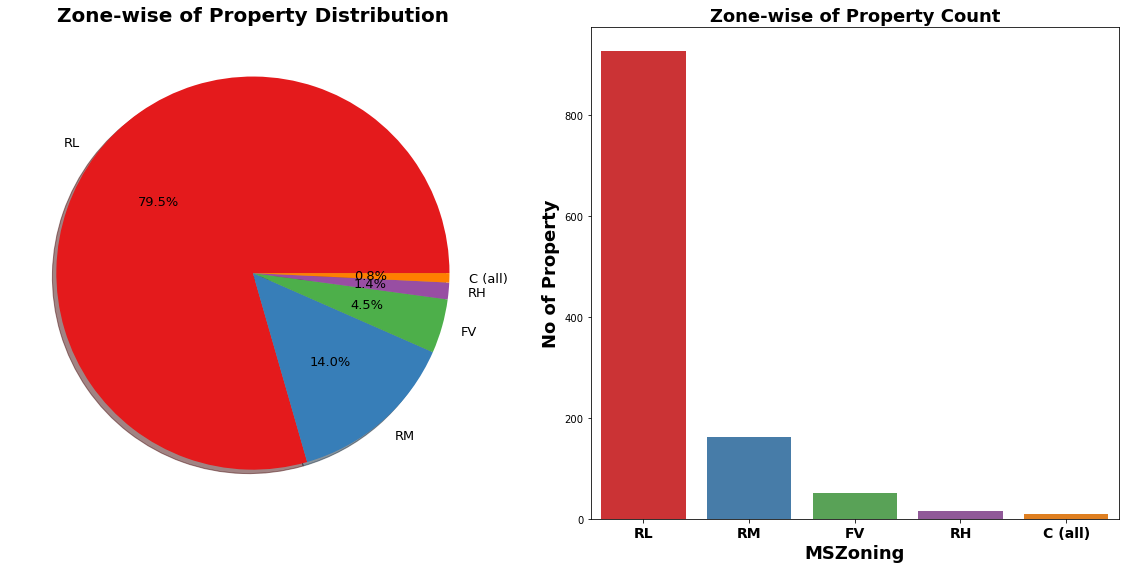

In [68]:
# Exploring MSZoning Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')
f,ax=plt.subplots(1,2,figsize=(16,8))
housing_df['MSZoning'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Zone-wise of Property Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('MSZoning',data=housing_df,ax=ax[1])
ax[1].set_title('Zone-wise of Property Count',fontsize=18,fontweight ='bold')
ax[1].set_xlabel("MSZoning",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("No of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.show()

### Observation:
- **79.5% of House properties belongs to Low Density Residential Area followed by 14 % of properties belong to Medium  Density Residential Area.**
- **Very Few property (0.8%) belongs to Commerical zone.**

***Lets explore Zone relation with respect to Sale Price***

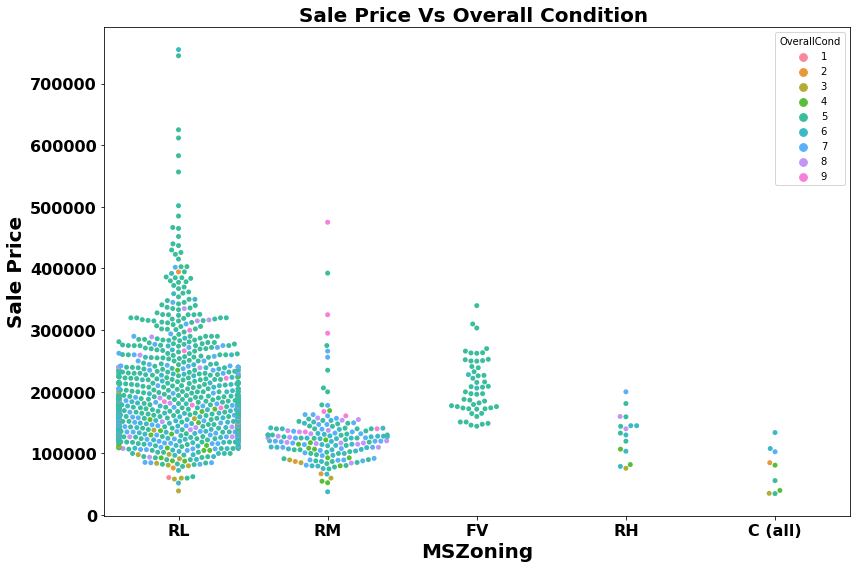

In [69]:
plt.rcParams['figure.autolayout']= True
sns.set_palette('gnuplot2_r')
plt.figure(figsize=(12,8))
sns.swarmplot(y=housing_df['SalePrice'], x=housing_df['MSZoning'], hue =housing_df['OverallCond'])
plt.title("Sale Price Vs Overall Condition ",fontsize=20,fontweight ='bold')
plt.xlabel('MSZoning',fontsize = 20,fontweight ='bold')
plt.ylabel('Sale Price',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

## Observation :
- **Most of property for sale have <u>overall condition rating of either 5 or 6.</u>**
- **We already know of 80% of housing data belongs to Low density Residential Area and Now we can see in Swramplot that Sale Price inside RL Zone is much higher than other remaining zone.**
- **Cheapest properties are available in Commerical zone.**
- **Another interesting observation we get here is for some house properties having Overall condition Rating of 8 & 9 have low price compare to others. <u>This indicate that Overall Condition Rating is Not significant factor in determination of Sale price.</u> Overall Condition Rating may helpful to buyer in taking decision of Buying property but not in determination of House Price.**

***There may be other factors like Street Size or House Size may have major correlation with Sale Price.***

### **LotFrontage: Linear feet of street connected to property**

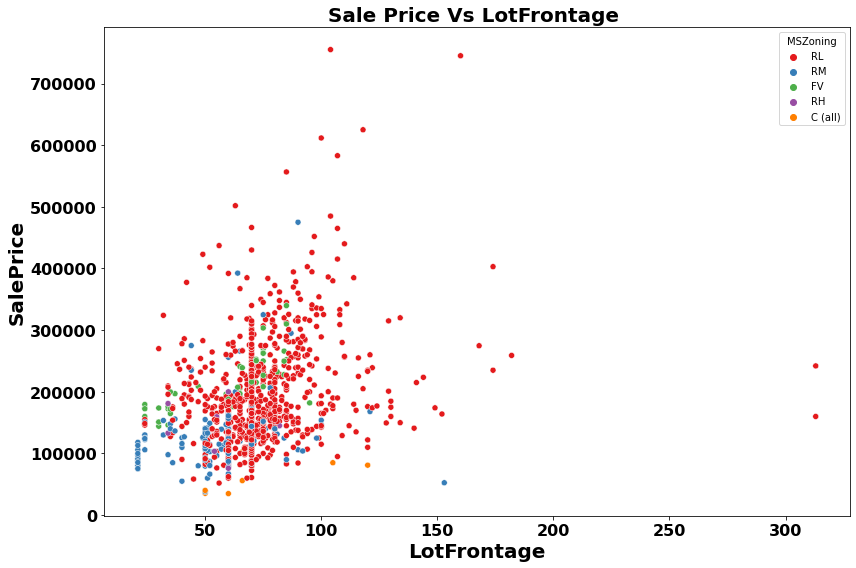

In [70]:
plt.rcParams['figure.autolayout']= True
sns.set_palette('Set1')
plt.figure(figsize=(12,8))
sns.scatterplot(y=housing_df['SalePrice'], x=housing_df['LotFrontage'], hue =housing_df['MSZoning'])
plt.title("Sale Price Vs LotFrontage ",fontsize=20,fontweight ='bold')
plt.xlabel('LotFrontage',fontsize = 20,fontweight ='bold')
plt.ylabel('SalePrice',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

### Observation:
- **With Exception of Commerical zone, <em>As Lot Frontage area increase (which indicate Size of street connected to property) the Sale Price increases.</em>**

### **How Quality & Area of house affect Pricing?**

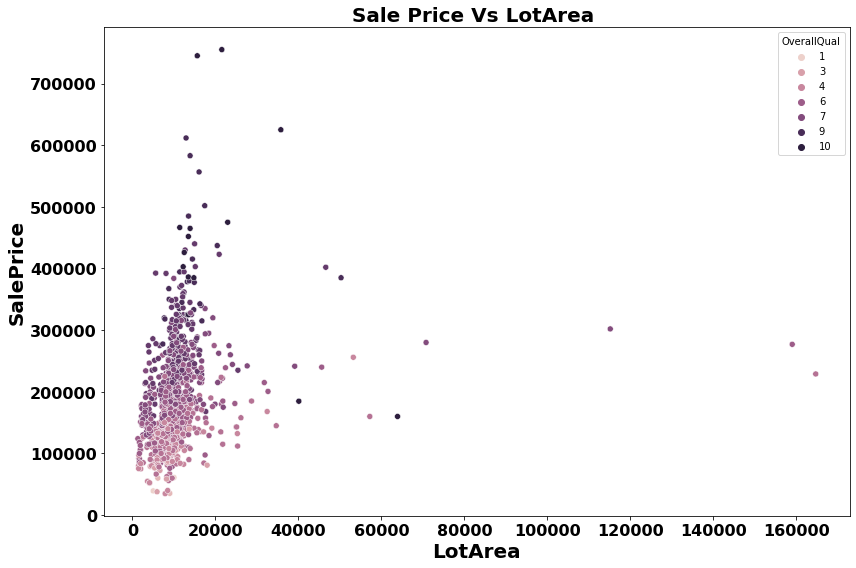

In [71]:
plt.rcParams['figure.autolayout']= True
sns.set_palette('rainbow')
plt.figure(figsize=(12,8))
sns.scatterplot(y=housing_df['SalePrice'], x=housing_df['LotArea'], hue =housing_df['OverallQual'])
plt.title("Sale Price Vs LotArea ",fontsize=20,fontweight ='bold')
plt.xlabel('LotArea',fontsize = 20,fontweight ='bold')
plt.ylabel('SalePrice',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

### Observation:
- **There is <u>No Significant relationship</u> found between Sale price & Lot area.**
***
**Here we get Important Observation that -**

<u>***As Overall Quality of House Increase the Sale Price of House also Increases.***</u>

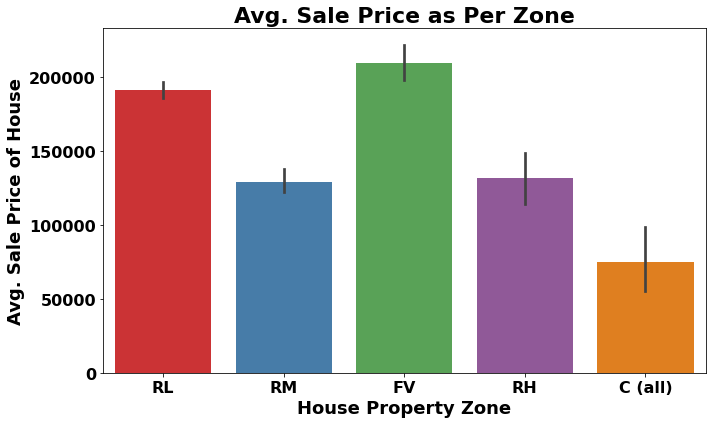

In [72]:
plt.rcParams['figure.autolayout'] = True
sns.set_palette("Set1")
plt.figure(figsize = (10,6))
sns.barplot(y = housing_df['SalePrice'], x= housing_df['MSZoning'])
plt.title('Avg. Sale Price as Per Zone', fontsize=22, fontweight='bold')
plt.xlabel('House Property Zone', fontsize= 18, fontweight='bold')
plt.ylabel('Avg. Sale Price of House', fontsize=18, fontweight= 'bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

### Observation :
- **In terms of Average Sale price house properties belonging to Floating Village Residential Zone are costiler than rest**

**Effect of Land characteristics on Sale Price**

### Lot Shape Description :-
**LotShape: General shape of property**

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

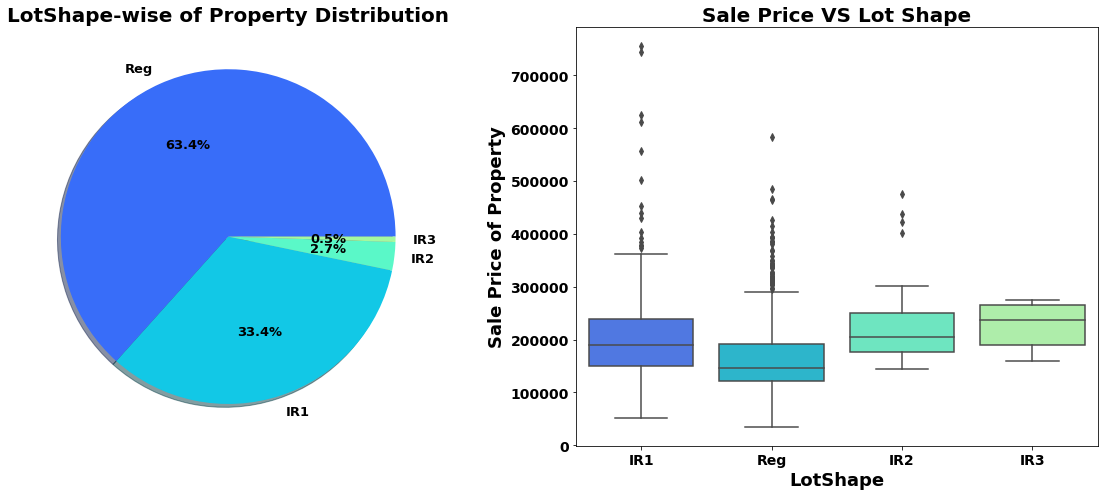

In [73]:
# Exploring LotShape Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
f,ax=plt.subplots(1,2,figsize=(16,7))
housing_df['LotShape'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13,'fontweight':'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('LotShape-wise of Property Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.boxplot(y=housing_df['SalePrice'], x=housing_df['LotShape'], ax=ax[1])
ax[1].set_title('Sale Price VS Lot Shape',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("LotShape",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

### Observation :
- **63.4% house properties are regular in shape.**
- **Sale Price of property with slight irregular shape is higher than regular shape.**

### Land Contour Description :
**LandContour: Flatness of the property**

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

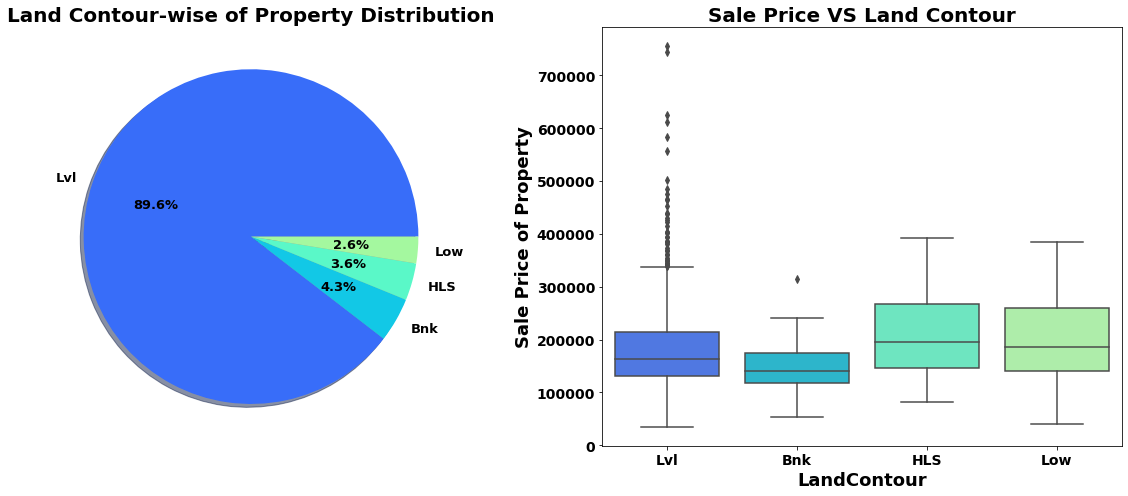

In [74]:
# Exploring LandContour Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')
f,ax=plt.subplots(1,2,figsize=(16,7))
housing_df['LandContour'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={ 'fontsize':13,'fontweight':'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('Land Contour-wise of Property Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.boxplot(y=housing_df['SalePrice'], x=housing_df['LandContour'], ax=ax[1])
ax[1].set_title('Sale Price VS Land Contour',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("LandContour",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

### Observation :
- **89.6% of House properties are near flat level surface.**
- **Also price for Flat level surface house is much higher than other land contour.**

### LotConfig Description :-
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

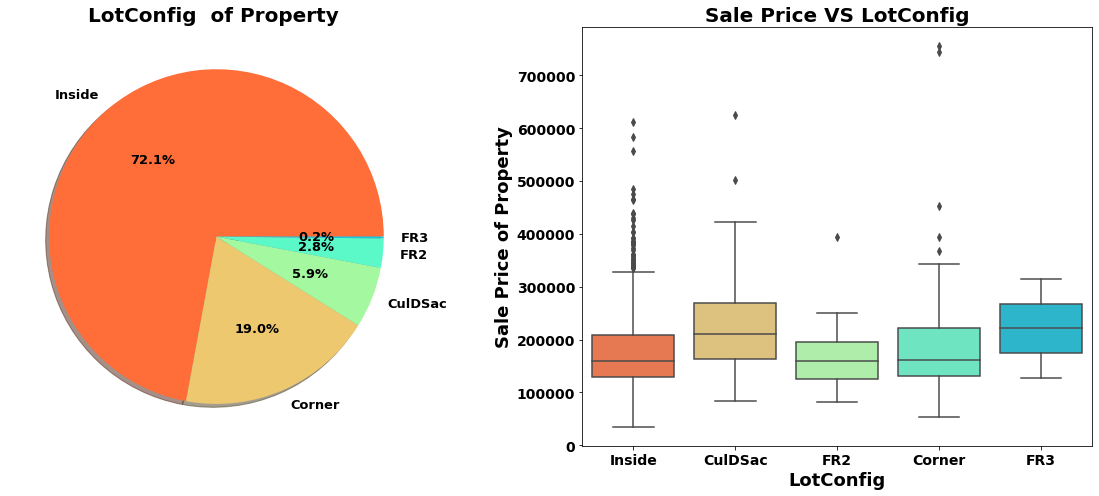

In [75]:
# Exploring LotConfig Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow_r')
f,ax=plt.subplots(1,2,figsize=(16,7))
housing_df['LotConfig'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={'fontsize':13,'fontweight':'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('LotConfig  of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.boxplot(y=housing_df['SalePrice'], x=housing_df['LotConfig'], ax=ax[1])
ax[1].set_title('Sale Price VS LotConfig',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("LotConfig",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

### Observation :-
- **Around 72 % of house comes with inside Lot configuration.**
- **Cul-de-sac has <u>maxmium Mean Sale Price</u> among all lot configuration.**
- **Cheapest Houses belong to <u>Inside lot configuration</u> while Costlier houses belongs to <u>Corner Lot Configuration.</u>**

### LandSlope Description :-
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

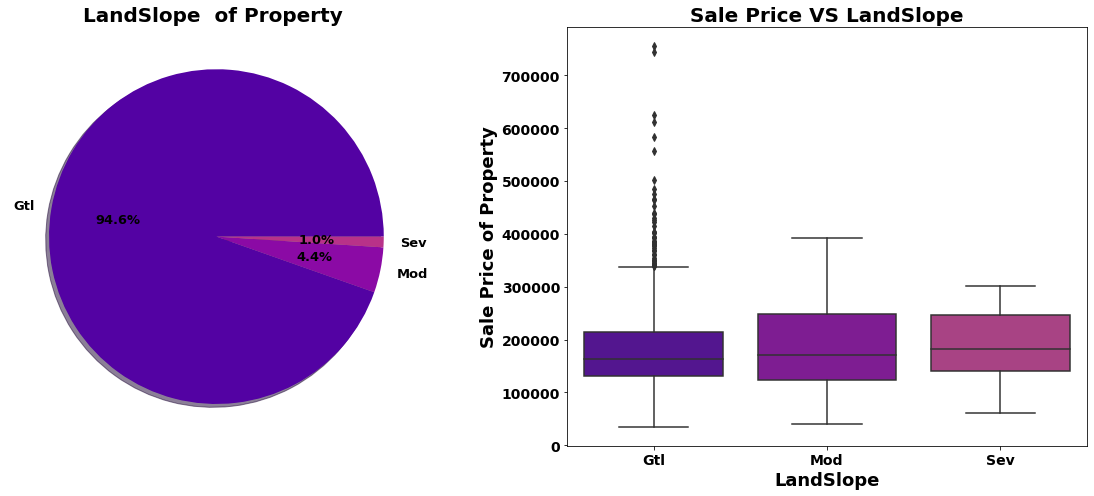

In [76]:
# Exploring LandSlope Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('plasma')
f,ax=plt.subplots(1,2,figsize=(16,7))
housing_df['LandSlope'].value_counts().plot.pie(autopct='%2.1f%%',
                                          textprops ={'fontsize':13,'fontweight':'bold'}, ax=ax[0],shadow=True)
ax[0].set_title('LandSlope  of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.boxplot(y=housing_df['SalePrice'], x=housing_df['LandSlope'], ax=ax[1])
ax[1].set_title('Sale Price VS LandSlope',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("LandSlope",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

### Observation :
- **Clearly we can see in boxplot that as Land slope increases the Sale price of house decreases.**
- **1% properties come with severe slope and they come with low price compare to Gentle Slope properties.**

**Effect of Building Style on Sale Price**

### BldgType Description :-
**BldgType: Type of dwelling**
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

### HouseStyle Description :-
**HouseStyle: Style of dwelling**
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

In [77]:
Feature_grp1 = ["BldgType", "HouseStyle", "OverallQual", "OverallCond"]

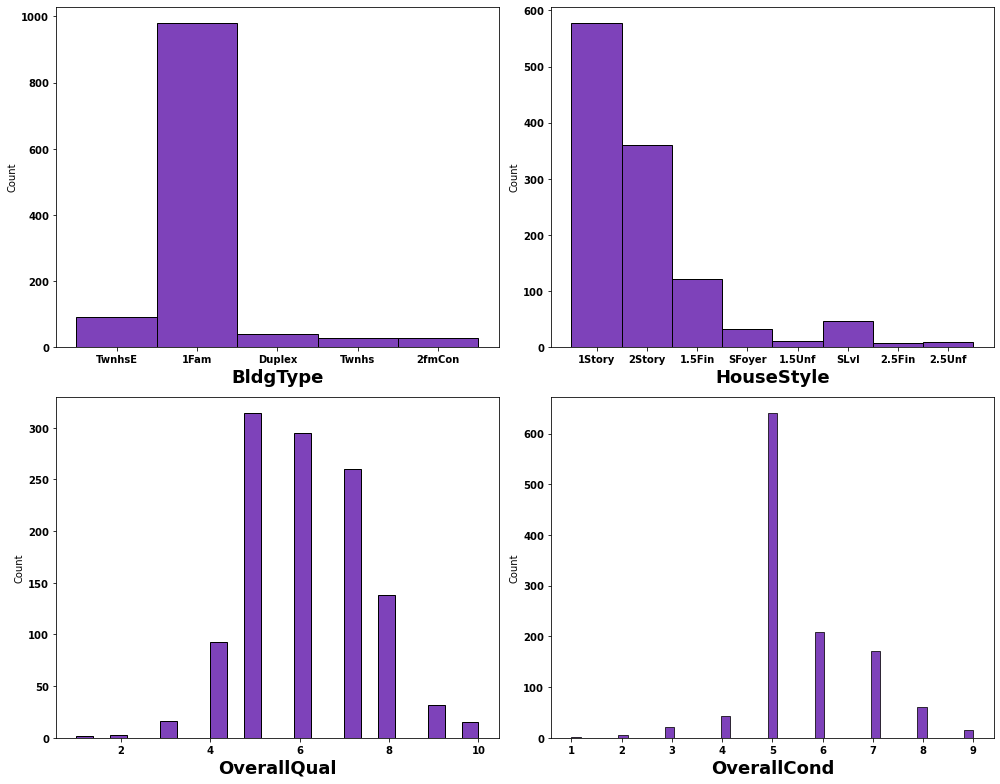

In [78]:
plt.figure(figsize=(14,11),facecolor='white')
plotnumber=1

for i in Feature_grp1:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.histplot( housing_df[i])
        plt.xlabel(i,fontsize=18,fontweight ='bold')
        plt.xticks(fontweight ='bold')
        plt.yticks(fontweight ='bold')
    plotnumber+=1
plt.tight_layout()
plt.show()

### Observation :
- **More than 950 house properties are with building type Single-family Detached**
- **More than 50% of house properties comes with Overall Condition Rating of 5.**
- **More than 75% of house properties come with overall Quality Rating varies between 5 to 6.**
- **More than 500 House Properties comes with one story dwelling.** 

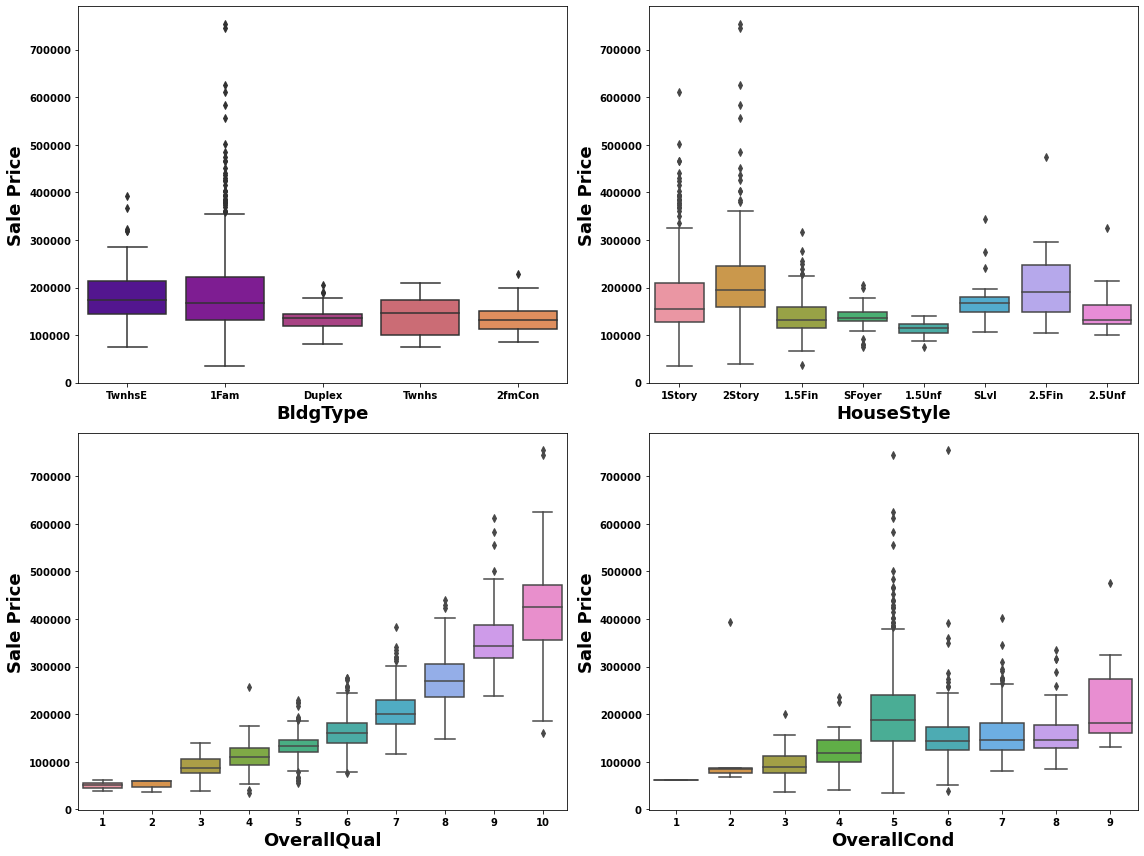

In [79]:
plt.figure(figsize=(16,12),facecolor='white')
plotnumber=1

for i in Feature_grp1:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(y = housing_df['SalePrice'], x= housing_df[i])
        plt.xlabel(i,fontsize=18,fontweight ='bold')
        plt.ylabel('Sale Price', fontsize =18, fontweight='bold')
        plt.xticks(fontweight ='bold')
        plt.yticks(fontweight ='bold')
    plotnumber+=1
plt.tight_layout()
plt.show()

### - **AS Overall Quality increases the sale price also increase with it.**

In [81]:
housing_df.rename(columns= {'Year_Since' : 'Year_Since_Sold'}, inplace = True)

In [82]:
Feature_grp2 = ["Year_SinceBuilt", "Year_SinceRemodAdded", 'Year_Since_Sold', "GarageAge"]

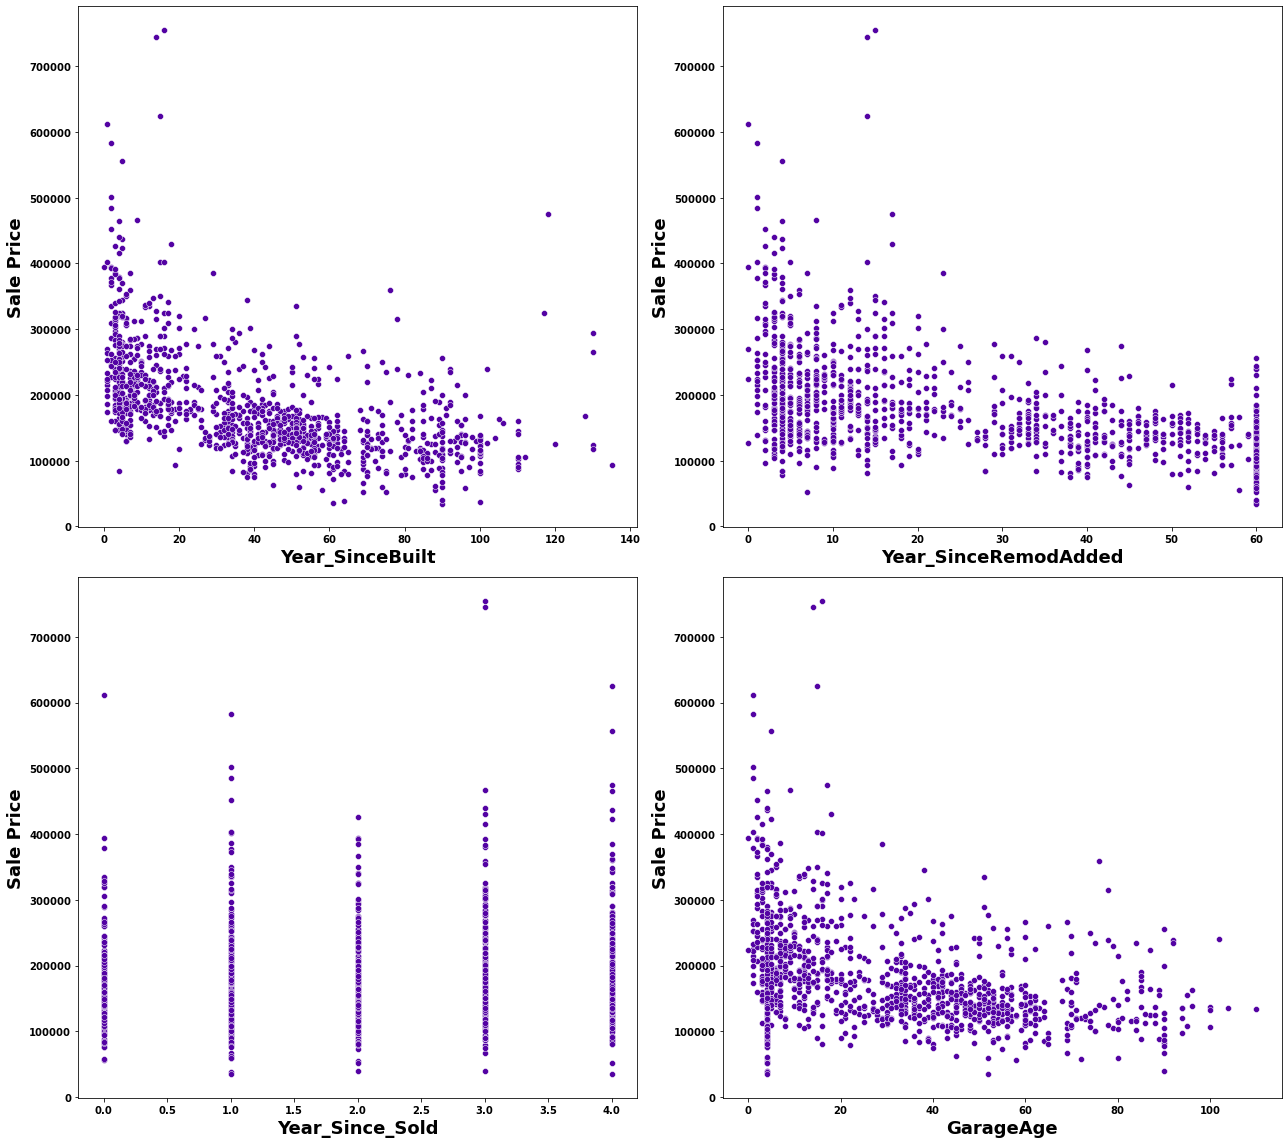

In [83]:
plt.figure(figsize=(18,16),facecolor='white')
plotnumber=1

for i in Feature_grp2:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.scatterplot(y = housing_df['SalePrice'], x= housing_df[i])
        plt.xlabel(i,fontsize=18,fontweight ='bold')
        plt.ylabel('Sale Price', fontsize =18, fontweight='bold')
        plt.xticks(fontweight ='bold')
        plt.yticks(fontweight ='bold')
    plotnumber+=1
plt.tight_layout()
plt.show()

### Observation :-
- **We can see that as Property get older with time its sale Price get depricates.**
- **20 years after Remodelling Price of properties start decreases.**
- **Older the garage age less the price of Property.**

### Sale related features

### SaleType Description :-
**SaleType : Type of sale**
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

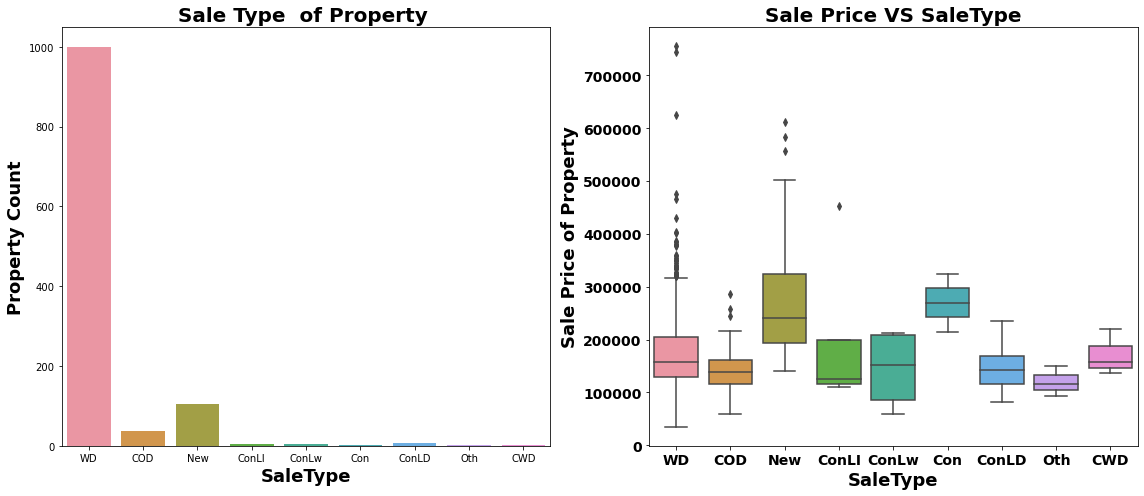

In [84]:
# Exploring SaleType Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gnuplot_r')
f,ax=plt.subplots(1,2,figsize=(16,7))
sns.countplot('SaleType',data=housing_df,ax=ax[0])
ax[0].set_title('Sale Type  of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('Property Count', fontsize=18,fontweight ='bold')
ax[0].set_xlabel('SaleType', fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')

sns.boxplot(y=housing_df['SalePrice'], x=housing_df['SaleType'], ax=ax[1])
ax[1].set_title('Sale Price VS SaleType',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("SaleType",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

### Observation :-
- **Around 1000 sales happen by Conventional Warranty Deed.** 
- **Home just constructed and sold category are exceptionally much costiler than any one else.**
- **All loan based sale are below 300000.**

### SaleCondition Description :-
**SaleCondition: Condition of sale**

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds,typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

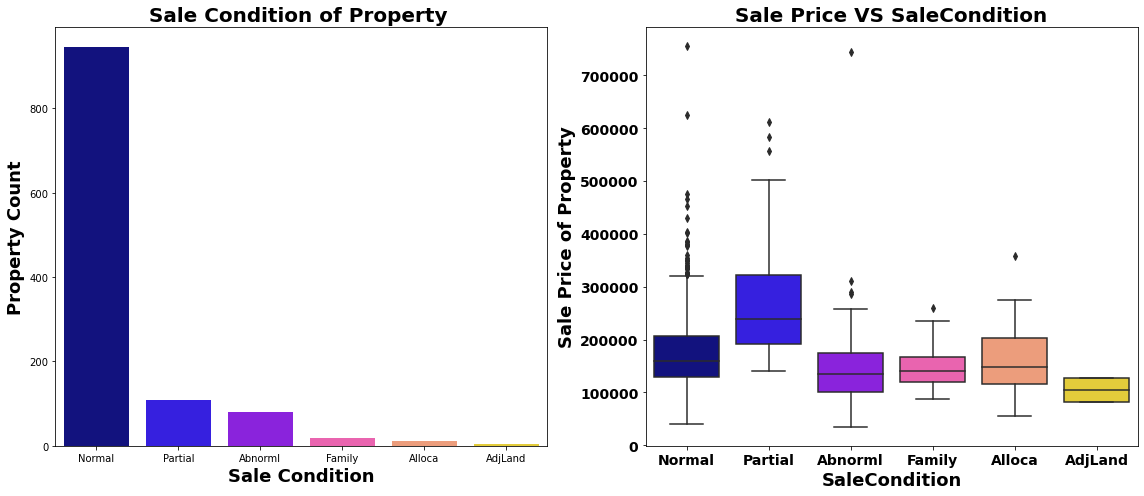

In [85]:
# Exploring SaleCondition Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gnuplot2')
f,ax=plt.subplots(1,2,figsize=(16,7))
sns.countplot('SaleCondition',data=housing_df,ax=ax[0])
ax[0].set_title('Sale Condition of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('Property Count', fontsize=18,fontweight ='bold')
ax[0].set_xlabel('Sale Condition', fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')

sns.boxplot(y=housing_df['SalePrice'], x=housing_df['SaleCondition'], ax=ax[1])
ax[1].set_title('Sale Price VS SaleCondition',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("SaleCondition",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

### Observation :-
- **We can see that Sale with condition like Abnorml, Family, Alloca, AdjLand are below the price of 300000.**
- **Maximum Base Price for House comes from Partial category- Home was not completed when last assessed (associated with New Homes) is higher than rest.**
- **Minimum base price comes from Normal condition sale and also highest sale price comes from this category.**

**Investigation of Relation between Floor Area and Sale Price**

> **It is common known fact that as Floor area increases the cost of Properties get increases.**
***
***Some of Property are single story while others are 2 story. In this Section we will explore relation between Grand Total Floor space (in square feet ) with Sale Price***

- **Note - We also know as Quality Rating increase Price of House increase so we incorparate Overall Quality Rating in exploration.**

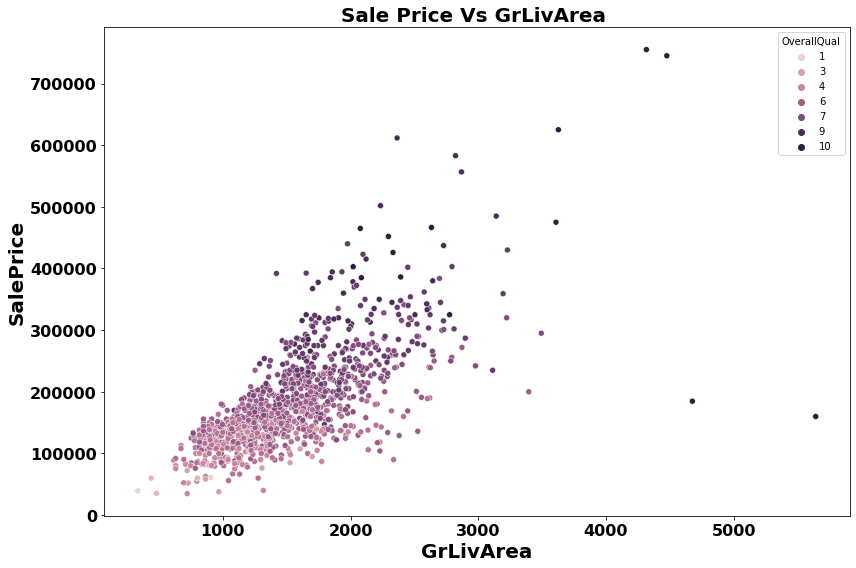

In [86]:
plt.rcParams['figure.autolayout']= True
sns.set_palette('rainbow')
plt.figure(figsize=(12,8))
sns.scatterplot(y=housing_df['SalePrice'], x=housing_df['GrLivArea'], hue =housing_df['OverallQual'])
plt.title("Sale Price Vs GrLivArea ",fontsize=20,fontweight ='bold')
plt.xlabel('GrLivArea',fontsize = 20,fontweight ='bold')
plt.ylabel('SalePrice',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

### Observation :- 
**In above plot we can clearly see relation between all three feature very clearly.**

***As total floor area increases the sale price also get increases corresponding the overall quality of House.***


### **RoofStyle Description** :-
RoofStyle: Type of roof

       Flat	     Flat
       Gable	    Gable
       Gambrel	  Gabrel (Barn)
       Hip	      Hip
       Mansard	  Mansard
       Shed	     Shed

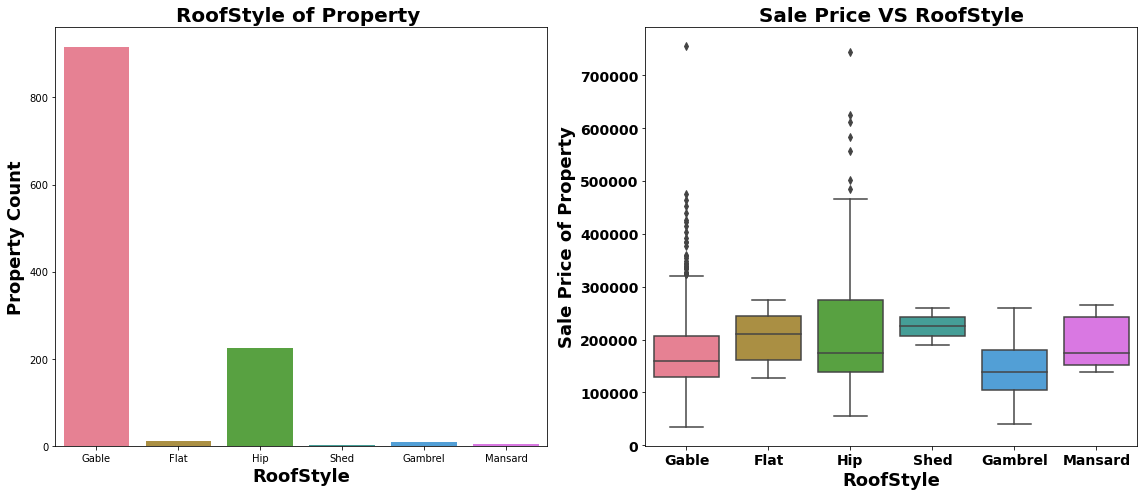

In [87]:
# Exploring RoofStyle Type
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(16,7))
sns.countplot('RoofStyle',data=housing_df,ax=ax[0])
ax[0].set_title('RoofStyle of Property ', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('Property Count', fontsize=18,fontweight ='bold')
ax[0].set_xlabel('RoofStyle', fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')

sns.boxplot(y=housing_df['SalePrice'], x=housing_df['RoofStyle'], ax=ax[1])
ax[1].set_title('Sale Price VS RoofStyle',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("RoofStyle",fontsize=18,fontweight ='bold')
ax[1].set_ylabel("Sale Price of Property",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.yticks(fontsize=14,fontweight ='bold')
plt.show()

### Observation :-
- **More than <u>75% House properties come with Gable Roof Style</u> followed by around <u>15 % house properties with Hip Style.</u>**
- **From Boxplot we can see that <u>Hip style Roof are much costlier</u> than remaining roof style.**

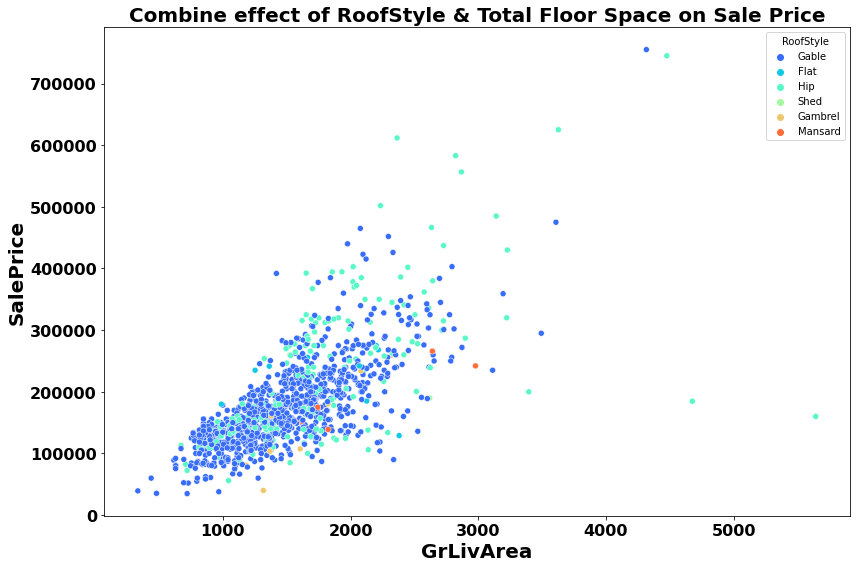

In [88]:
# Combine effect of RoofStyle & Total Floor Space on Sale Price
plt.rcParams['figure.autolayout']= True
sns.set_palette('rainbow')
plt.figure(figsize=(12,8))
sns.scatterplot(y=housing_df['SalePrice'], x=housing_df['GrLivArea'], hue =housing_df['RoofStyle'])
plt.title("Combine effect of RoofStyle & Total Floor Space on Sale Price",fontsize=20,fontweight ='bold')
plt.xlabel('GrLivArea',fontsize = 20,fontweight ='bold')
plt.ylabel('SalePrice',fontsize = 20,fontweight ='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.tight_layout()
plt.show()

### Observation :-
***For High floor area construction mainly Hip style Roof is used and invariably high cost properties mostly comes up with Hip Style Roof.***